## Oppgave 13a)

Compute the following line integral using Riemann sums and Simpson's method. Compare the two methods with regards to accuracy and rate of convergance.

The Curve of the line is given by:
$$
\vec r(t) = t^2\hat{i} + t\hat{j},\,\, t \in [-1,2]\\
$$
From the curve we get the trivial parametrization:
$$
C : \begin{cases}
    x = t^2\\
    y = t
\end{cases}
$$

The field which the curve travels through is given by:
$$
\vec F = y\hat{i} + x\hat{j} = t\hat{i} + t^2\hat{j}
$$
The line integral is given by:
$$
W = \int \vec F \cdot \vec{dr}
$$

Take derivative to get $\vec{dr}$:
$$
\vec r = t^2\hat{i} + t\hat{j}\\
\vec dr = 2t\hat{i} + \hat{j}
$$

Insert into line integral:
$$
W  = \int_{-1}^{2} (\vec F \cdot \vec{dr}) dt
 =\int_{-1}^{2} (t\hat{i} + t^2\hat{j})\cdot(2t\hat{i} + \hat{j})dt
 = \int_{-1}^{2} (2t^2 +  t^2)dt
$$

Text(0, 0.5, 'Error(N)')

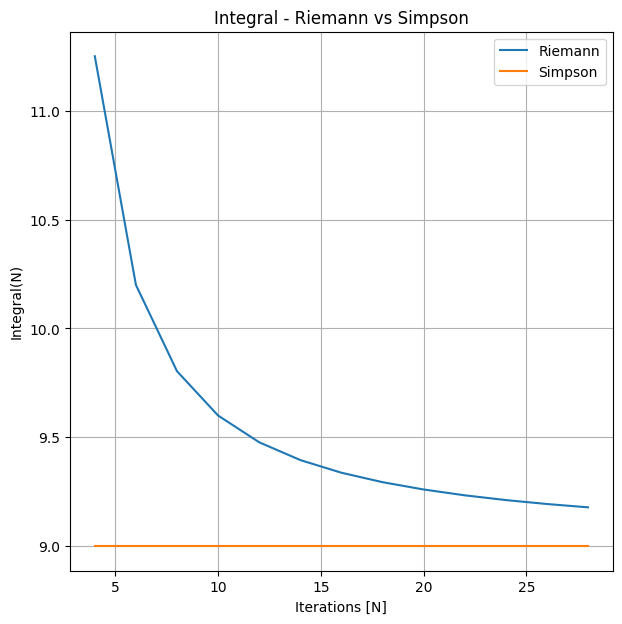

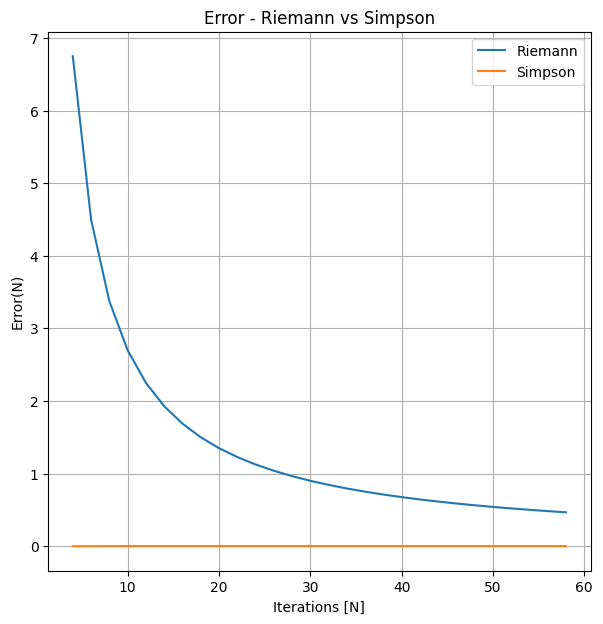

In [45]:
from numpy import linspace, array, arange

def riemann_upper(a,b,n,f):
    x = linspace(a,b,n)
    dx = (b-a)/n
    y = f(x)

    upper = 0
    for i in range(1,n):
        upper += y[i]*dx
    
    return upper

def riemann_lower(a,b,n,f):
    x = linspace(a,b,n)
    dx = (b-a)/n
    y = f(x)

    lower = 0
    for i in range(0,n-1):
        lower += y[i]*dx

    return lower

def simpson(a,b,n,f):
    assert n % 2 == 0 # Assert n is even

    epsilon = (b-a)/n
    x = linspace(a,b,n + 1)
    
    lst = [1]

    for i in range(1, n):
        if i % 2 == 0:
            lst.append(2)
        else:
            lst.append(4)

    lst.append(1)

    g = array(lst, dtype = int)
    y = f(x)

    integral = (epsilon/3)*g.dot(y.T)
    error = (-epsilon**4)/180

    return integral, error


def f(t):
    return 2*(t**2) + (t**2)
a = -1
b = 2

from matplotlib.pyplot import figure

# Plot integral - Riemann vs Simpson
N = arange(4, 30, 2)
riemannIntegral = [riemann_upper(a,b,n,f) for n in N]
simpsonIntegral = [simpson(a,b,n,f)[0] for n in N]

fig = figure(figsize=(7,7))
ax = fig.add_subplot()
ax.plot(N, riemannIntegral, label="Riemann")
ax.plot(N, simpsonIntegral, label="Simpson")
ax.grid()
ax.legend()
ax.set_title("Integral - Riemann vs Simpson")
ax.set_xlabel("Iterations [N]")
ax.set_ylabel("Integral(N)")

# Plot Error 
N = arange(4, 60, 2)
riemannError = [riemann_upper(a,b,n,f) - riemann_lower(a,b,n,f) for n in N]
simpsonError = [simpson(a,b,n,f)[1] for n in N]

fig = figure(figsize=(7,7))
ax = fig.add_subplot()
ax.plot(N, riemannError, label="Riemann")
ax.plot(N, simpsonError, label="Simpson")
ax.grid()
ax.legend()
ax.set_title("Error - Riemann vs Simpson")
ax.set_xlabel("Iterations [N]")
ax.set_ylabel("Error(N)")

